
# MMI 726 Multimedia Signal Processing
## Masking models

- This IPython notebook accompanies the material presented on Week 5 on the perceptual basis of audio coding. We will cover the conversion of basic quantities as described in the course and will use them in deriving the masked threshold of a complex tone with 10 harmonics.
- We will use just two libraries: ``numpy`` and ``matplotlib``in this notebook.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt

- Let us now define the functions that we will use for defining tha masked threshold. These were discussed in the course videos. 

In [98]:
def absthreshold(f):
  return 3.64 * (f/1000)**-0.8 - 6.5 * np.exp(-0.6 * (f/1000 - 3.3)**2) + 0.001 * (f/1000)**4

def freq2bark(f):
  return 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan((f / 7500.)**2)

def criticalbw(f):
  return 25 + 75 * (1 + 1.4 * (f / 1000)**2)**0.69

def barkcentres(b):
  assert ((b > 0) & (b < 25))
  fc = [50, 150, 250, 350, 450, 570, 700, 840, 1000, 1170, 1370, 1600, 1850, 2150, 2500, 2900, 3400, 4000, 4800, 5800, 7000, 8500, 10500, 13500]
  return fc[b-1]

def mspread(fmasker, f):
  bmasker = freq2bark(fmasker)
  bfreq = freq2bark(f)
  bx = bfreq - bmasker
  sfdb = 15.81 + 7.5 * (bx + 0.474) - 17.5 * np.sqrt(1 + (bx + 0.474)**2)
  return sfdb


- Let us now calculate and drwa the absolute threshold of hearing (ATH) using the closed-form model we discussed

Text(0, 0.5, 'Absolute Threshold of Hearing [dB (SPL)]')

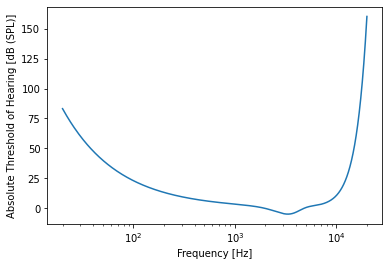

In [99]:
f = np.linspace(20, 20000., 19980)
ath = absthreshold(f)
plt.semilogx(f, ath)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Absolute Threshold of Hearing [dB (SPL)]")

- Let us calculate and plot the critical bandwidth at each frequency and overlay that with discrete CBs in Barks.

Text(0, 0.5, 'Critical Bandwidth [Hz]')

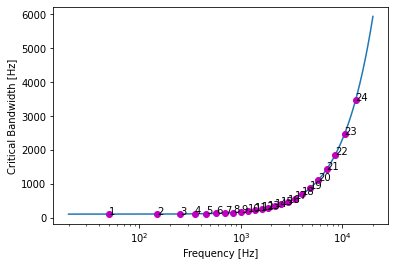

In [100]:
bwarr = criticalbw(f)
fc = []
for ind in range(1, 25):
  fc.append(barkcentres(ind))
fc = np.array(fc)
plt.semilogx(f, bwarr)
cb = criticalbw(fc)
plt.plot(fc, cb, 'om')
for ind in range(24):
  plt.annotate(str(ind+1), (fc[ind], cb[ind]))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Critical Bandwidth [Hz]")

- We will now calculate the shape of the spreading function for different centre frequencies. 
- You may observe that the spreading function is aymmetric with respect to the centre frequency and that the SF spreads upwards in frequency (i.e. a tone will mask higher frequencies more)



Text(0, 0.5, 'Spread Function [dB]')

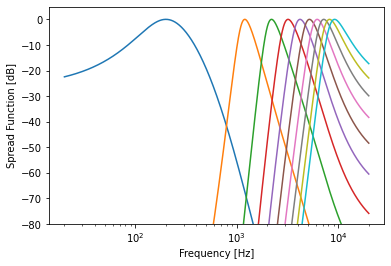

In [103]:
fmaskers = np.arange(200, 10000, 1000)
for fm in fmaskers:
  sfdb = mspread(fm, f)
  plt.semilogx(f, sfdb)
plt.ylim(-80, 5)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spread Function [dB]")

- Let us now caculate the masked threshold for a complex tone containing 10 components.
- Notice that the masked threshold follows the ATH for frequencies above approximately 4 kHz

Text(0, 0.5, 'Masked threshold [dB (SPL)]')

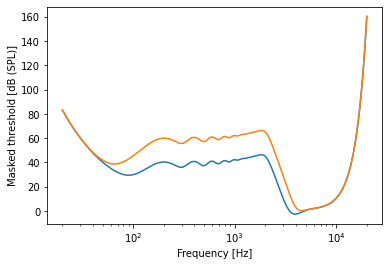

In [104]:
maskersf40 = np.zeros(len(f))
freqmask = np.arange(200, 2200, 200)
dbSPL = 40
amp = 10**(dbSPL/20)
for freq in freqmask:
  maskersf40 += amp * 10**(mspread(freq, f)/10)

maskersf60 = np.zeros(len(f))
dbSPL = 60
amp = 10**(dbSPL/20)
for freq in freqmask:
  maskersf60 += amp * 10**(mspread(freq, f)/10)

plt.semilogx(f, 20 * np.log10(10**(ath/20) + maskersf40), f, 20 * np.log10(10**(ath/20) + maskersf60))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Masked threshold [dB (SPL)]")

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics